<a href="https://colab.research.google.com/github/fuad0003/Contact-Us-Form/blob/main/Lab_3_Finding_Roots_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, you will learn how to use Python to implement several methods of locating the roots of a function.

#### **Import necessary packages:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### **A. Newton-Raphson method:**
You will implement the Newton-Raphson method to find the root of the following function.
$$𝑓(𝑥) = 𝑒^𝑥 − 3𝑥 $$
The Newton-Raphson method is an iterative method that uses the tangent line to the function to find the root. The method starts with an initial guess $x_0$ and then iterates to find a better approximation of the root. The iteration is given by the following formula:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

where $f(x)$ is the function whose root we are trying to find and $f'(x)$ is the derivative of $f(x)$. The iteration stops when the difference between two consecutive approximations is less than a given tolerance $\epsilon$. We will follow the following steps to implement the Newton-Raphson method:

##### **Step 1: Define the function and its derivative:**
You have to define a function `f(x)` that takes a number $x$ as input and returns the value of $f(x) = e^x - 3x$. You also have to define a function `fprime(x)` that takes a number $x$ as input and returns the value of derivative of $f(x)$, i.e., $f'(x) = e^x - 3$.

In [ ]:
def f(x):
    return np.exp(x) - 3*x

def fprime(x):
    return np.exp(x) - 3

##### **Step 2: Define initial guess and tolerance:**
You have to define a variable `x_0` that stores the initial guess and a variable `epsilon` that stores the tolerance (approximate relative error). You can choose any value for `x_0`. Use `epsilon = 0.001` for this assignment.

In [ ]:
x_0 = 2
epsilon = 1e-3

##### **Step 3: Implement the Newton-Raphson method:**
Loop through the following steps until the relative error is less than the tolerance:

  1. Calculate the next approximation of the root using the formula given above.
  2. Calculate the relative error between the current approximation and the previous approximation.
  3. Print the current approximation and the error.
  4. Plot the function and the estimated root on the same plot.
  5. Update the current approximation to be the next approximation.


Current approximation: 1.6835 with error: 0.1880


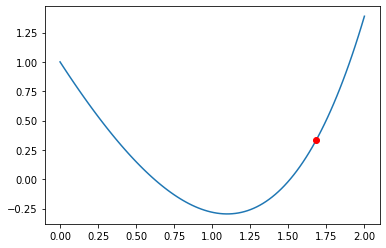

Current approximation: 1.5435 with error: 0.0907


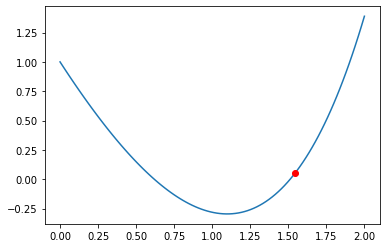

Current approximation: 1.5135 with error: 0.0198


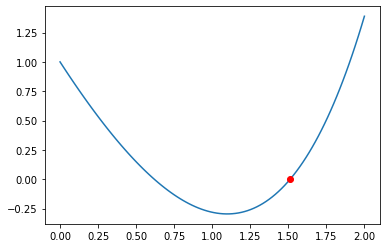

Current approximation: 1.5121 with error: 0.0009


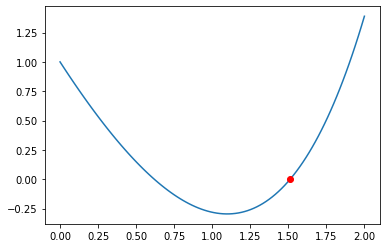

In [ ]:
error = 100

while error > epsilon:
    x_new = x_0 - f(x_0)/fprime(x_0)

    error = np.abs(x_new - x_0)/np.abs(x_new)

    print("Current approximation: {:.4f} with error: {:.4f}".format(x_new, error))

    plt.plot(np.linspace(0, 2, 100), f(np.linspace(0, 2, 100)))
    plt.plot(x_new, f(x_new), 'ro')
    plt.show()

    x_0 = x_new


#### **B. Newton-Raphson method using finite difference derivatives:**
You will implement the Newton-Raphson method using finite difference derivative to find the root of the following function.
$$𝑓(𝑥) = 𝑒^𝑥 − 3𝑥 $$
Previously, you have implemented the Newton-Raphson method using the analytical derivative of the function. You will implement the Newton-Raphson method using finite difference derivative in this part. We will use the following formulas to calculate the finite difference derivative:
>1. Forward difference derivative:
>$$f'(x) = \frac{f(x + h) - f(x)}{h}$$
>2. Backward difference derivative:
>$$f'(x) = \frac{f(x) - f(x - h)}{h}$$
>3. Central difference derivative:
>$$f'(x) = \frac{f(x + h) - f(x - h)}{2h}$$
where $h$ is the step size. You can choose any value for $h$. We will follow the following steps to implement the Newton-Raphson method using finite difference derivative:

##### **Step 1: Define the function and its derivatives:**
You have to define a function `f(x)` that takes a number $x$ as input and returns the value of $f(x) = e^x - 3x$. You also have to define the following functions that take a number $x$ as input and returns the value of the derivative of $f(x)$ using the corresponding finite difference derivative formula:
>1. `fprime_forward(x, h)`
>2. `fprime_backward(x, h)`
>3. `fprime_central(x, h)`

In [ ]:
def f(x):
    return np.exp(x) - 3*x

def fprime_forward(x, h):
    return (f(x+h) - f(x))/h

def fprime_central(x, h):
    return (f(x+h) - f(x-h))/(2*h)

def fprime_backward(x, h):
    return (f(x) - f(x-h))/h

##### **Step 2: Define initial guess, tolerance, and step size:**
You have to define a variable `x_0` that stores the initial guess and a variable `epsilon` that stores the tolerance. You can choose any value for `x_0`. Use `epsilon = 0.001` for this assignment. You also have to define a variable `h` that stores the step size. We will use `h = 0.01` for this assignment.

In [ ]:
x_0 = 1
epsilon = 1e-3
h = 1e-2

##### **Step 3: Implement the Newton-Raphson method using finite difference derivative:**
Write the following function that takes the initial guess, tolerance, and step size as inputs and returns the root of the function using the Newton-Raphson method using finite difference derivative:
>1. `nr_fordiff(x_0, epsilon, h)` for forward difference derivative
>2. `nr_bakdiff(x_0, epsilon, h)` for backward difference derivative
>3. `nr_cendiff(x_0, epsilon, h)` for central difference derivative

Each function should loop through the following steps until the relative error between two consecutive approximations is less than the tolerance $\epsilon$:

  1. Calculate the next approximation of the root using the formula given above.
  2. Store the current approximation in a list.
  3. Calculate the relative error between the current approximation and the previous approximation.
  4. Print the iteration number, the current approximation, $f(current approximation)$, and the error as shown in the example below.

  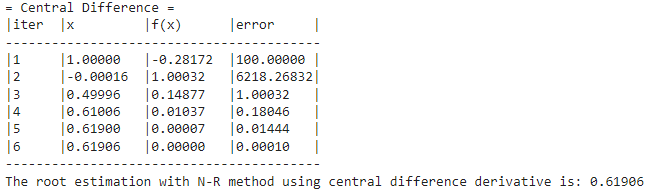
  
  5. Update the current approximation to be the next approximation.

The function should return the list of approximations.

In [ ]:
def nr_fordiff(x_0, h, epsilon):
    error = 100
    iter = 1
    x_new = x_0
    current_approx = np.array([x_new])

    print("= Forward Difference =")
    print("|{:<6}|{:<10}|{:<10}|{:<10}|".format("iter", "x", "f(x)", "error"))
    print("-"*41)
    print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, np.around(x_new, 5), np.around(f(x_new), 5), np.around(error, 5)))

    while error > epsilon:
        iter += 1

        x_new = x_0 - f(x_0)/fprime_forward(x_0, h)
        current_approx = np.append(current_approx, x_new)

        error = abs(x_new-x_0)/abs(x_new)

        print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, np.around(x_new, 5), np.around(f(x_new), 5), np.around(error, 5)))

        x_0 = x_new

    print("-"*41)
    print("The root estimation with N-R method using central difference derivative is: {:.5f}".format(x_new))

    return current_approx


def nr_cendiff(x_0, h, epsilon):
    error = 100
    iter = 1
    x_new = x_0
    current_approx = np.array([x_new])

    print("= Central Difference =")
    print("|{:<6}|{:<10}|{:<10}|{:<10}|".format("iter", "x", "f(x)", "error"))
    print("-"*41)
    print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, np.around(x_new, 5), np.around(f(x_new), 5), np.around(error, 5)))

    while error > epsilon:
        iter += 1

        x_new = x_0 - f(x_0)/fprime_central(x_0, h)
        current_approx = np.append(current_approx, x_new)

        error = abs(x_new-x_0)/abs(x_new)

        print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, np.around(x_new, 5), np.around(f(x_new), 5), np.around(error, 5)))

        x_0 = x_new

    print("-"*41)
    print("The root estimation with N-R method using central difference derivative is: {:.5f}".format(x_new))

    return current_approx


def nr_backdiff(x_0, h, epsilon):
    error = 100
    iter = 1
    x_new = x_0
    current_approx = np.array([x_new])

    print("= Backward Difference =")
    print("|{:<6}|{:<10}|{:<10}|{:<10}|".format("iter", "x", "f(x)", "error"))
    print("-"*41)
    print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, np.around(x_new, 5), np.around(f(x_new), 5), np.around(error, 5)))

    while error > epsilon:
        iter += 1

        x_new = x_0 - f(x_0)/fprime_backward(x_0, h)
        current_approx = np.append(current_approx, x_new)

        error = abs(x_new-x_0)/abs(x_new)

        print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, np.around(x_new, 5), np.around(f(x_new), 5), np.around(error, 5)))

        x_0 = x_new

    print("-"*41)
    print("The root estimation with N-R method using central difference derivative is: {:.5f}".format(x_new))

    return current_approx

##### **Step 4: Plot the approximations:**
Use the function you wrote in the previous step to get the list of approximations. Then, plot the list of approximations against the number of iterations for all three methods. The x-axis should be the number of iterations and the y-axis should be the approximation. The subplot should have legends to distinguish between the three methods. Also, plot the original function in another subplot. The plot should look like the example below:

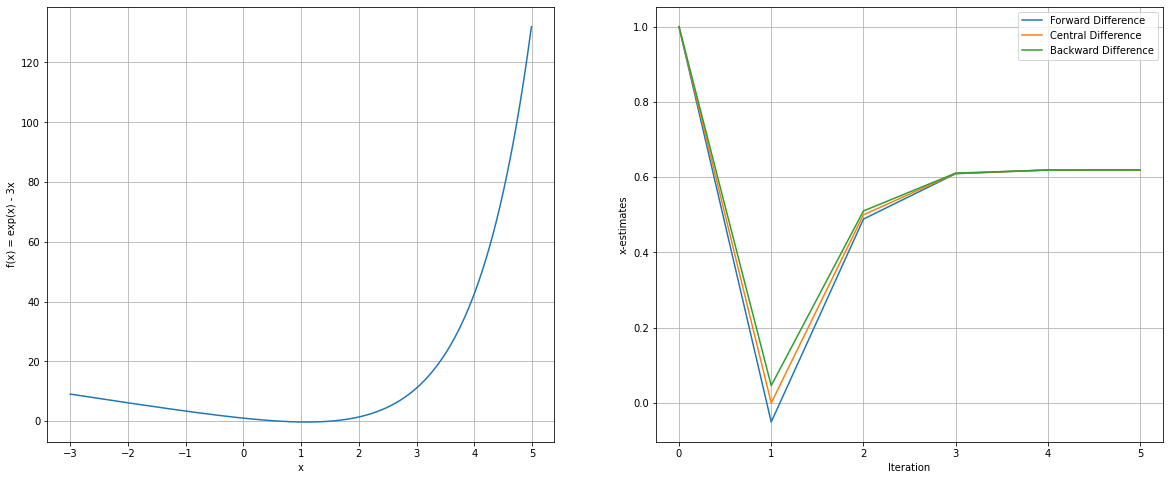

= Forward Difference =
|iter  |x         |f(x)      |error     |
-----------------------------------------
|1     |1.00000   |-0.28172  |100.00000 |
|2     |-0.05087  |1.10301   |20.65863  |
|3     |0.48855   |0.16431   |1.10412   |
|4     |0.60919   |0.01137   |0.19804   |
|5     |0.61906   |-0.00000  |0.01594   |
|6     |0.61906   |0.00000   |0.00000   |
-----------------------------------------
The root estimation with N-R method using central difference derivative is: 0.61906
= Central Difference =
|iter  |x         |f(x)      |error     |
-----------------------------------------
|1     |1.00000   |-0.28172  |100.00000 |
|2     |-0.00016  |1.00032   |6218.26832|
|3     |0.49996   |0.14877   |1.00032   |
|4     |0.61006   |0.01037   |0.18046   |
|5     |0.61900   |0.00007   |0.01444   |
|6     |0.61906   |0.00000   |0.00010   |
-----------------------------------------
The root estimation with N-R method using central difference derivative is: 0.61906
= Backward Difference =
|iter 

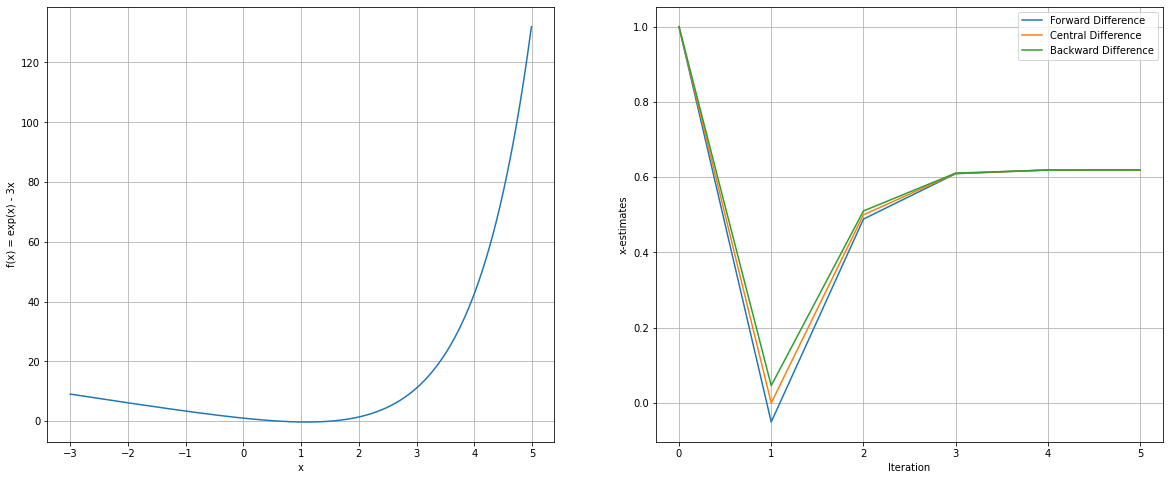

In [ ]:
# Write appropriate code
x = np.arange(-3,5, 0.01)
y = f(x)

x_fordiff = nr_fordiff(x_0, h, epsilon)
x_cendiff = nr_cendiff(x_0, h, epsilon)
x_backdiff = nr_backdiff(x_0, h, epsilon)

plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.plot(x, y, label="f(x)")
plt.xlabel("x")
plt.ylabel("f(x) = exp(x) - 3x")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, len(x_fordiff)), x_fordiff, label="Forward Difference")
plt.plot(np.arange(0, len(x_cendiff)), x_cendiff, label="Central Difference")
plt.plot(np.arange(0, len(x_backdiff)), x_backdiff, label="Backward Difference")
plt.xlabel("Iteration")
plt.ylabel("x-estimates")
plt.legend()
plt.grid(True)

plt.show()

#### **C. Modefied Newton-Raphson Method:**

To alleviate the problem of the slow convergence of the Newton-Raphson method on functions with multiple roots, we can use the modified Newton-Raphson method. This method uses the fact that $f(x)$ and $u(x) := \frac{f(x)}{f'(x)}$ both have the same zeors as $f(x)$ goes to zero before $f'(x)$ does, and instead approximates a root of $u(x)$ that is defined as:

$$ u(x) = \frac{f(x)}{f'(x)} $$

the Newton-Raphson method is then applied to $u(x)$,

$$ x_{n+1} = x_n - \frac{u(x_n)}{u'(x_n)} $$

We can then derrive the update rule for the modified Newton-Raphson method in terms of $f(x)$ as:

$$ x_{n+1} = x_n - \frac{f(x_n)f'(x_n)}{(f'(x_n))^2 - f(x_n)f''(x_n)} $$

As we can see, the modified Newton-Raphson method uses the second derivative of $f(x)$ to calculate the next approximation. We will use the following formulas to calculate the second order finite difference derivative:

>1. Second order forward difference derivative:
>$$f''(x) = \frac{f'(x + h) - f'(x)}{h}$$
>2. Second order backward difference derivative:
>$$f''(x) = \frac{f'(x) - f'(x - h)}{h}$$
>3. Second order central difference derivative:
>$$f''(x) = \frac{f'(x + h) - f'(x - h)}{2h}$$

Now, you will implement the modified Newton-Raphson method using finite difference derivative to find the root of the following function.

$$𝑓(𝑥) = (x-3)^3(x+1)$$

We will follow the following steps to implement the modified Newton-Raphson method using finite difference derivative:

##### **Step 1: Define the function and its derivatives:**
You have to define a function `f(x)` that takes a number $x$ as input and returns the value of $f(x) = (x-3)^3(x+1)$. You also have to define the following functions that take a number $x$ as input and returns the value of the derivative of $f(x)$ using the corresponding finite difference derivative formula:

>1. `fprime_forward(x, h)`
>2. `fprime_backward(x, h)`
>3. `fprime_central(x, h)`
>4. `fprime2_forward(x, h)`
>5. `fprime2_backward(x, h)`
>6. `fprime2_central(x, h)`

In [ ]:
# Write appropriate code
def f(x):
    return (x-3)**3 * (x+1)

def fprime_forward(x, h):
    return (f(x+h) - f(x))/h

def fprime_central(x, h):
    return (f(x+h) - f(x-h))/(2*h)

def fprime_backward(x, h):
    return (f(x) - f(x-h))/h

def fprime2_forward(x, h):
    return (fprime_forward(x+h, h) - fprime_forward(x, h))/h

def fprime2_central(x, h):
    return (fprime_central(x+h, h) - fprime_central(x-h, h))/(2*h)

def fprime2_backward(x, h):
    return (fprime_backward(x, h) - fprime_backward(x-h, h))/h

##### **Step 2: Define initial guess, tolerance, and step size:**
You have to define a variable `x_0` that stores the initial guess and a variable `epsilon` that stores the tolerance. Use `x_0 = 0` and `epsilon = 0.001` for this assignment. You also have to define a variable `h` that stores the step size. We will use `h = 0.01` for this assignment.

In [ ]:
# Write appropriate code
x_0 = 0
h = 0.01
epsilon = 1e-3

##### **Step 3: Implement the modified Newton-Raphson method using finite difference derivative:**
Write the following function that takes the initial guess, tolerance, and step size as inputs and returns the root of the function using the modified Newton-Raphson method using finite difference derivative:

>1. `mnr_fordiff(x_0, epsilon, h)` for forward difference derivative
>2. `mnr_backdiff(x_0, epsilon, h)` for backward difference derivative
>3. `mnr_cendiff(x_0, epsilon, h)` for central difference derivative

Each function should loop through the following steps until the relative error between two consecutive approximations is less than the tolerance $\epsilon$:

  1. Calculate the next approximation of the root using the formula given above.
  2. Store the current approximation in a list.
  3. Calculate the relative error between the current approximation and the previous approximation.
  4. Print the iteration number, the current approximation, $f(current approximation)$, and the error as shown in the example below.

  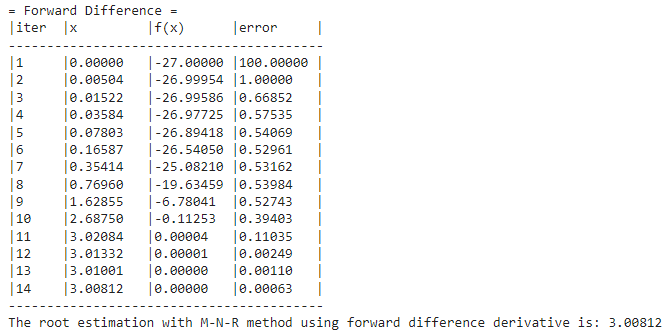
  
  5. Update the current approximation to be the next approximation.

The function should return the list of approximations.

In [ ]:
# Write appropriate code
def mnr_fordiff(x_0, h, epsilon):
    error = 100
    iter = 1
    x_new = x_0
    current_approx = np.array([x_new])

    print("= Forward Difference =")
    print("|{:<6}|{:<10}|{:<10}|{:<10}|".format("iter", "x", "f(x)", "error"))
    print("-"*41)
    print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, x_new, f(x_new), error))

    while error > epsilon:
        iter += 1

        x_new = x_0 - f(x_0)*fprime_forward(x_0, h)/(fprime_forward(x_0, h)**2 - f(x_0)*fprime2_forward(x_0, h))
        current_approx = np.append(current_approx, x_new)

        error = abs(f(x_new))

        print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, x_new, f(x_new), error))

        x_0 = x_new

    print("-"*41)
    print("The root estimation with M-N-R method using forward difference derivative is: {:.5f}".format(x_new))

    return current_approx

def mnr_backdiff(x_0, h, epsilon):
    error = 100
    iter = 1
    x_new = x_0
    current_approx = np.array([x_new])

    print("= Backward Difference =")
    print("|{:<6}|{:<10}|{:<10}|{:<10}|".format("iter", "x", "f(x)", "error"))
    print("-"*41)
    print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, x_new, f(x_new), error))

    while error > epsilon:
        iter += 1

        x_new = x_0 - f(x_0)*fprime_backward(x_0, h)/(fprime_backward(x_0, h)**2 - f(x_0)*fprime2_backward(x_0, h))
        current_approx = np.append(current_approx, x_new)

        error = abs(f(x_new))

        print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, x_new, f(x_new), error))

        x_0 = x_new

    print("-"*41)
    print("The root estimation with M-N-R method using backward difference derivative is: {:.5f}".format(x_new))

    return current_approx

def mnr_cendiff(x_0, h, epsilon):
    error = 100
    iter = 1
    x_new = x_0
    current_approx = np.array([x_new])

    print("= Central Difference =")
    print("|{:<6}|{:<10}|{:<10}|{:<10}|".format("iter", "x", "f(x)", "error"))
    print("-"*41)
    print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, x_new, f(x_new), error))

    while error > epsilon:
        iter += 1

        x_new = x_0 - f(x_0)*fprime_central(x_0, h)/(fprime_central(x_0, h)**2 - f(x_0)*fprime2_central(x_0, h))
        current_approx = np.append(current_approx, x_new)

        error = abs(f(x_new))

        print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, x_new, f(x_new), error))

        x_0 = x_new

    print("-"*41)
    print("The root estimation with M-N-R method using central difference derivative is: {:.5f}".format(x_new))

    return current_approx

##### **Step 4: Plot the difference between the convergence rate of the modified Newton-Raphson method and the Newton-Raphson method:**
Use the functions you wrote in the previous step to get the list of approximations for the modified Newton-Raphson method using forward difference derivative and the Newton-Raphson method using forward difference derivative. Then, plot the difference between the two lists of approximations against the number of iterations. The x-axis should be the number of iterations and the y-axis should be the difference between the two lists of approximations. Also, plot the original function in another subplot. The plot should look like the example below:

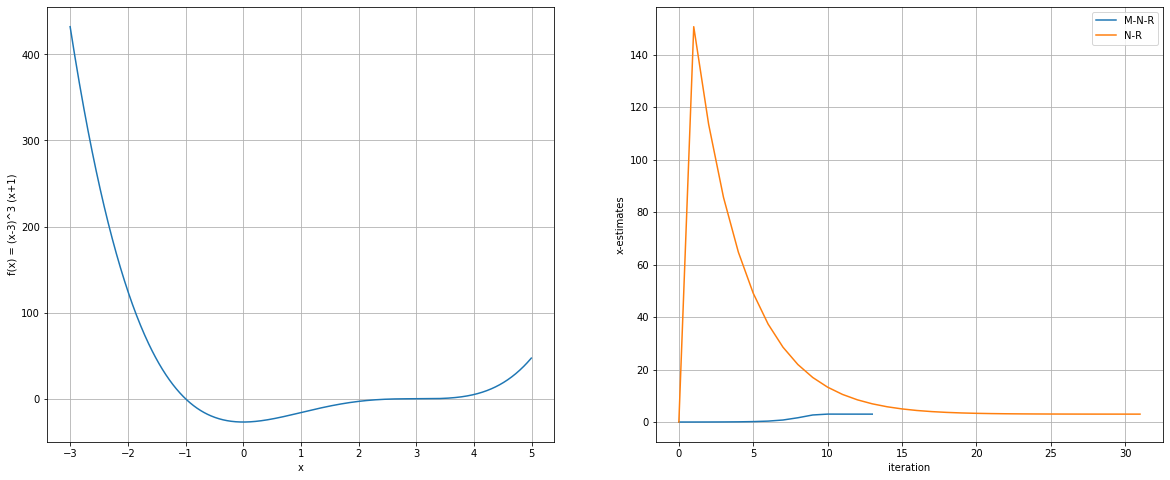

= Forward Difference =
|iter  |x         |f(x)      |error     |
-----------------------------------------
|1     |0.00000   |-27.00000 |100.00000 |
|2     |0.00504   |-26.99954 |26.99954  |
|3     |0.01522   |-26.99586 |26.99586  |
|4     |0.03584   |-26.97725 |26.97725  |
|5     |0.07803   |-26.89418 |26.89418  |
|6     |0.16587   |-26.54050 |26.54050  |
|7     |0.35414   |-25.08210 |25.08210  |
|8     |0.76960   |-19.63459 |19.63459  |
|9     |1.62855   |-6.78041  |6.78041   |
|10    |2.68750   |-0.11253  |0.11253   |
|11    |3.02084   |0.00004   |0.00004   |
-----------------------------------------
The root estimation with M-N-R method using forward difference derivative is: 3.02084
= Forward Difference =
|iter  |x         |f(x)      |error     |
-----------------------------------------
|1     |0.00000   |-27.00000 |100.00000 |
|2     |150.66880 |488385219.45356|1.00000   |
|3     |113.51033 |154544401.76292|0.32736   |
|4     |85.64310  |48905066.48226|0.32539   |
|5     |64.744

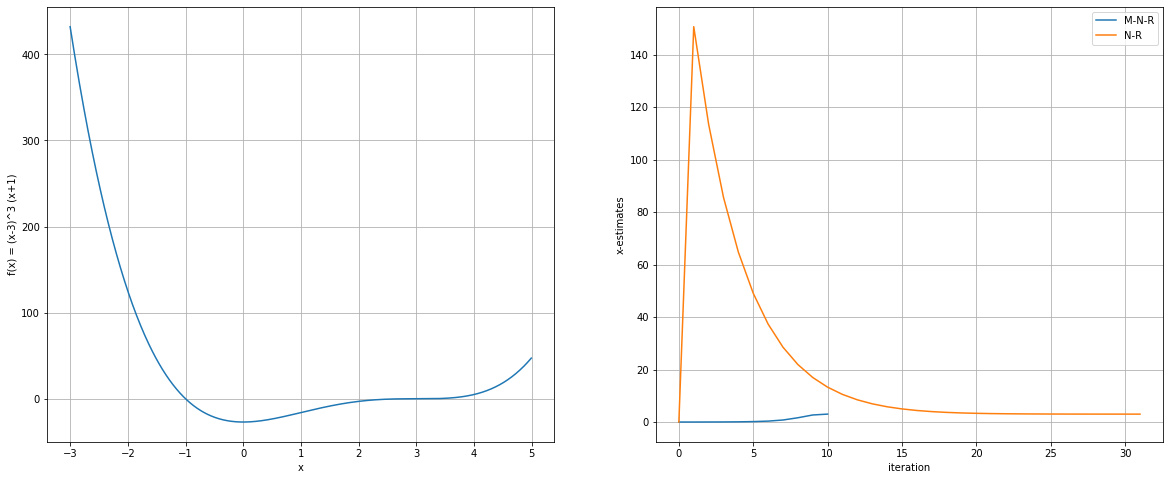

In [ ]:
# Write appropriate code
x = np.arange(-3, 5, 0.01)
y = f(x)

x_fordiff_mnr = mnr_fordiff(x_0, h, epsilon)
x_fordiff_nr = nr_fordiff(x_0, h, epsilon)

plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.plot(x, y, label="f(x)")
plt.xlabel("x")
plt.ylabel("f(x) = (x-3)^3 (x+1)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_fordiff_mnr, label="M-N-R")
plt.plot(x_fordiff_nr, label="N-R")
plt.xlabel("iteration")
plt.ylabel("x-estimates")
plt.grid(True)
plt.legend()
plt.show()